# SALES PREDICTION USING PYTHON

# CODSOFT

Step 1: Import Libraries

First, import the necessary libraries for data manipulation, visualization, and modeling.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Step 2: Load the Data

Load your dataset into a Pandas DataFrame:

In [8]:
data = pd.read_csv("C:\\Users\\Narthana\\Downloads\\advertising.csv")  

Step 3: Data Cleaning

Check for missing values and handle them if necessary. In this dataset, there might not be any missing values, but it's good practice to check.

In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Step 4: Exploratory Data Analysis (EDA)

Perform EDA to understand the data's distribution, relationships, and statistics. Use various visualizations to gain insights:

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


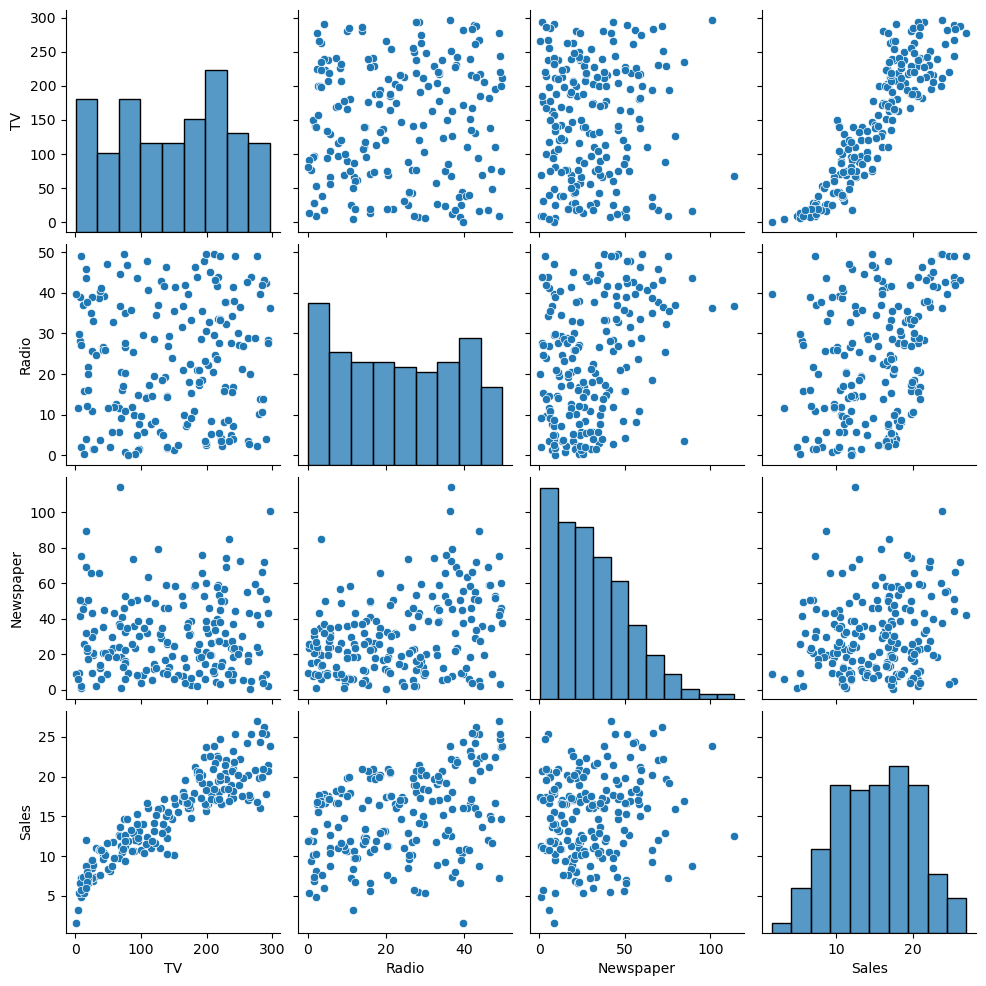

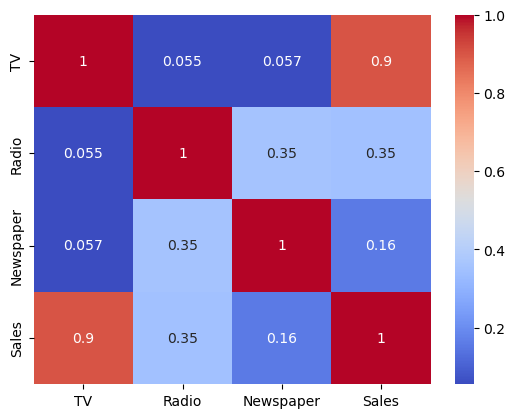

In [10]:
# Summary statistics
print(data.describe())

# Pairplot for visualizing relationships between variables
sns.pairplot(data)
plt.show()

# Correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Calculating Average Sales:

To calculate the average sales from your dataset, you can simply use the mean() function on the 'Sales' column:

In [16]:
average_sales = data['Sales'].mean()
print("Average Sales:", average_sales)


Average Sales: 15.130500000000001


Histogram of Sales:

Visualize the distribution of sales values using a histogram.

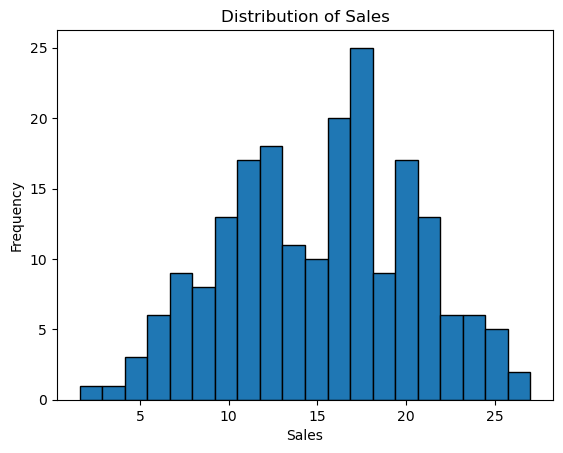

In [17]:
plt.hist(data['Sales'], bins=20, edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()


Scatter Plots for Individual Advertising Channels:

Create scatter plots to see the relationship between each advertising channel (TV, Radio, Newspaper) and sales.

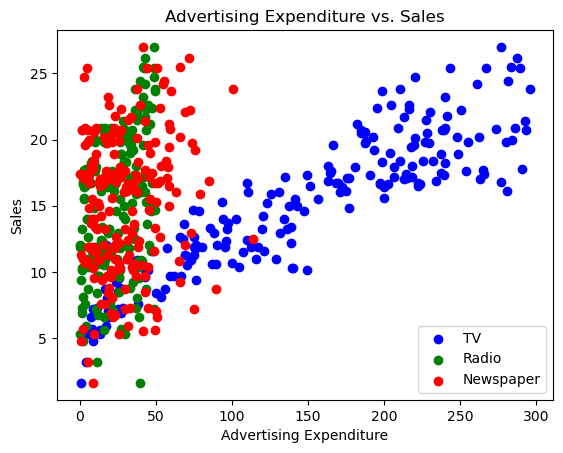

In [18]:
plt.scatter(data['TV'], data['Sales'], c='blue', label='TV')
plt.scatter(data['Radio'], data['Sales'], c='green', label='Radio')
plt.scatter(data['Newspaper'], data['Sales'], c='red', label='Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.title('Advertising Expenditure vs. Sales')
plt.show()


Box Plot for Sales:

Create a box plot to visualize the distribution of sales and identify potential outliers.

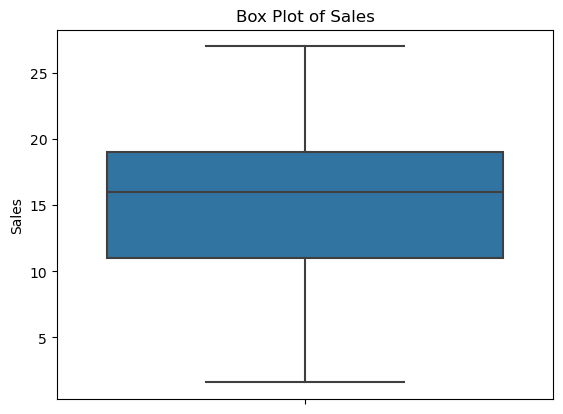

In [20]:
sns.boxplot(y=data['Sales'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()


Descriptive Statistics: You calculate and print summary statistics for the 'Sales' column, including measures like mean, standard deviation, minimum, maximum, and quartiles.

Outlier Detection: You use the interquartile range (IQR) method to detect potential outliers. Any data points falling below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered potential outliers. These outliers are printed at the end.    

In [27]:
# Descriptive statistics
summary_stats = data['Sales'].describe()

# Detect and print potential outliers
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Sales'] < lower_bound) | (data['Sales'] > upper_bound)]

print("Summary Statistics for Sales:")
print(summary_stats)
print("\nPotential Outliers:")
print(outliers)

Summary Statistics for Sales:
count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

Potential Outliers:
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


Step 5: Feature Selection

Based on the EDA, select the relevant features (independent variables) for the prediction. In this case, it appears that TV, Radio, and Newspaper advertising expenditures are relevant for predicting sales.

In [11]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


Step 6: Split Data into Training and Testing Sets

Split the data into training and testing sets to train and evaluate the model.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 7: Model Training

Train a linear regression model on the training data:

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Step 8: Model Evaluation

Evaluate the model's performance on the test data:

In [14]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2.907756910271089
R-squared: 0.9059011844150826


Step 9: Make Predictions

In [15]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [20]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 19.740528001816998


Step 10: Inference

Based on the output and visualizations, you can draw the following inferences:

TV advertising expenditure has a strong positive correlation with sales.
Radio advertising expenditure also has a positive correlation with sales but weaker than TV.
Newspaper advertising expenditure has a relatively weak positive correlation with sales.